In [2]:
!python -m spacy download de_core_news_sm

    100% |████████████████████████████████| 38.2MB 47.2MB/s ta 0:00:01    29% |█████████▌                      | 11.4MB 65.3MB/s eta 0:00:01
  Running setup.py install for de-core-news-sm ... done
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

    Linking successful
    /opt/conda/lib/python3.6/site-packages/de_core_news_sm -->
    /opt/conda/lib/python3.6/site-packages/spacy/data/de_core_news_sm

    You can now load the model via spacy.load('de_core_news_sm')




<img src="https://images.freeimages.com/images/large-previews/2b9/letters-1-yes-1188348.jpg" alt="drawing" width="350"/>

# Briefing about Word2Vec:

<img src="http://mccormickml.com/assets/word2vec/skip_gram_net_arch.png" alt="drawing" width="550"/>

[[1]](#References:)


## Purpose of the tutorial:
As I said before, this tutorial focuses on the right use of the Word2Vec package from the Gensim libray; therefore, I am not going to explain the concepts and ideas behind Word2Vec here. I am simply going to give a very brief explanation, and provide you with links to good, in depth tutorials.

## Brief explanation:

Word2Vec was introduced in two [papers](#Material-for-more-in-depths-understanding:) between September and October 2013, by a team of researchers at Google. Along with the papers, the researchers published their implementation in C. The Python implementation was done soon after the 1st paper, by [Gensim](https://radimrehurek.com/gensim/index.html). 

The underlying assumption of Word2Vec is that two words sharing similar contexts also share a similar meaning and consequently a similar vector representation from the model. For instance: "dog", "puppy" and "pup" are often used in similar situations, with similar surrounding words like "good", "fluffy" or "cute", and according to Word2Vec they will therefore share a similar vector representation.<br>

From this assumption, Word2Vec can be used to find out the relations between words in a dataset, compute the similarity between them, or use the vector representation of those words as input for other applications such as text classification or clustering.

# Getting Started

## Setting up the environment:

`python==3.6.3`

Libraries used:
 * `xlrd==1.1.0`: https://pypi.org/project/xlrd/
 * `spaCy==2.0.12`: https://spacy.io/usage/
 * `gensim==3.4.0`: https://radimrehurek.com/gensim/install.html
 * `scikit-learn==0.19.1`: http://scikit-learn.org/stable/install.html
 * `seaborn==0.8`: https://seaborn.pydata.org/installing.html

In [43]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing
from spacy.lang.de import German


import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
print(os.listdir("../input"))

/kaggle/input/dialogue-lines-of-the-simpsons/simpsons_dataset.csv
/kaggle/input/alpine-text-issue-1985/ML_1985.csv
['dialogue-lines-of-the-simpsons', 'alpine-text-issue-1985']


In [73]:
data = pd.read_csv('../input/alpine-text-issue-1985/ML_1985.csv',sep='\t',encoding='utf8' , quotechar = '"')
simpson = pd.read_csv('../input/dialogue-lines-of-the-simpsons/simpsons_dataset.csv')
data.shape

(9131, 2)

In [6]:
df.head(10)

,row_number,word
0,15626310,Ein
1,15626311,vielseitiges
2,15626312,Bergsteigerland
3,15626313,im
4,15626314,Herzen
5,15626315,des
6,15626316,ladinischen
7,15626317,Sprach
8,15626318,und
9,15626319,Siedlungsraumes


In [79]:
t = time()

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_threads=-1)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 2.25 mins


In [80]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(92412, 1)

In [126]:
df_clean.head(20)

,clean
0,' ' ' vielseitig ' ' bergsteigerland ' ' ' '...
1,' ' ' ' ' anblick ' ' ' ' ' ' seiseralm ' ' ...
2,' ' ' seila ' ' ' ' langkofel ' ' ' ' ' ' wa...
3,' ' ' strahlenf rmig ' ' laufen ' ' ' ' t le...
4,' ' ' schnellen ' ' gelingen ' ' ' ' ' ' bet...
5,' ' ' ' ' ' ' himmelsrichtung ' ' ' ' ' ' ' ...
6,' ' ' ' ' sella ' ' pr sentiert ' ' ' ' ' ' ...
7,' ' ' ' ' respekteinfl enden ' ' mauern ' ' ...
8,' ' ' ' ' ' ' ' ' ausgedehnt ' ' hochfl che ...
9,' ' ' ' ' langkofelgruppe ' ' ' ' ' ' vergle...


In [20]:
nlp = spacy.load('de_core_news_sm', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

In [88]:
class State:
    def __init__(self):
        self.b = 1.0
 
    def increase(self):
        self.b = self.b + 1
        return self.b
    
state = State()

In [89]:
data["sentence"] = data.word.apply(lambda x: state.increase() if x in ['.'] else state.b)
data.head(50)

,row_number,word,sentence
0,15626310,Ein,1.0
1,15626311,vielseitiges,1.0
2,15626312,Bergsteigerland,1.0
3,15626313,im,1.0
4,15626314,Herzen,1.0
5,15626315,des,1.0
6,15626316,ladinischen,1.0
7,15626317,Sprach,1.0
8,15626318,und,1.0
9,15626319,Siedlungsraumes,1.0


In [71]:
test = data["word"]
test.head()
for i in range(len(test)):
    print(test[i].replace('"','\\"'))

Ein
vielseitiges
Bergsteigerland
im
Herzen
des
ladinischen
Sprach
und
Siedlungsraumes
Allgemeiner
Überblick
Sella
und
Langkofel
!
Wer
kennt
sie
nicht
,
diese
benachbarten
Felsbastionen
im
Herzen
der
Dolomiten
.
Ihr
Anblick
von
der
Seiseralm
,
vom
Sella
oder
vom
Grödnerjoch
aus
bleibt
jedem
unvergeßlich
.
Seila
und
Langkofel
sind
die
Wahrzeichen
des
ladinischen
Sprach
und
Siedlungsraums
in
den
Dolomiten
.
Strahlenförmig
laufen
vier
Täler
in
verschiedene
Himmelsrichtungen
von
diesen
mächtigen
Gebirgsstöcken
weg
und
beherbergen
Menschen
mit
einer
eigenen
,
alten
Sprache
und
Geschichte
:
die
Täler
von
Abtei
,
Groden
,
Fassa
und
Buchenstein
haben
an
der
Sella
ihren
Ursprung
.
Schnell
gelingt
es
dem
Betrachter
,
die
besonderen
Eigenarten
der
beiden
Gruppen
zu
erfassen
;
und
deutlich
drängen
sich
bald
grundverschiedene
Merkmale
auf
.
Von
welcher
Himmelsrichtung
er
auch
kommen
mag
,
meint
der
Bergfreund
den
Ehrgeiz
dieser
Massive
zu
spüren
,
ihre
unterschiedliche
Gestalt
,
ihren
so
gegensätzli

erstellt
,
doch
bleiben
für
den
Wanderer
noch
viele
einsame
,
unberührte
Winkel
,
die
einen
Besuch
dieser
wohl
größten
Almfläche
Europas
lohnen
.
Dies
vor
allem
im
Frühsommer
,
wenn
die
Alpenflora
in
Blüte
steht
und
die
Wiesen
einem
farbenprächtigen
Blumenmeer
gleichen
.
Nun
aber
zur
Langkofelgruppe
selbst
.
Besonders
beliebt
ist
dort
die
Rundwanderung
um
die
ganze
Gruppe
.
Diese
Tageswanderung
ist
weder
übermäßig
lang
noch
anstrengend
.
Zweimal
ist
unterwegs
zudem
Einkehrmöglichkeit
geboten
(
Comici
und
Plattkofelhütte
)
.
Ein
besonderes
Merkmal
der
Wanderung
ist
der
ständige
Wechsel
der
Landschaftsbilder
.
Wer
den
Langkofel
allein
umwandern
will
,
kann
,
wenn
ihm
danach
ist
,
den
Gondellift
vom
Sellajoch
zur
Langkofelscharte
zwischen
Langkofel
und
Fünffingerspitze
benutzen
und
sich
so
den
mühsamen
Aufstieg
dorthin
ersparen
.
Der
Weiterweg
führt
dann
durch
das
wildromantische
Langkofelkar
hinunter
(
Einkehrmöglichkeit
in
der
Langkofelhütte
)
,
umrundet
den
Berg
nord
und
ostseitig
und


Wunsch
offenlassen
.
Dennoch
soll
die
Pfeilerführe
von
Tita
Piaz
am
selben
Berg
auf
diesem
Präsentierteller
von
Kletterschmankerln
nicht
fehlen
.
Weitere
solcher
Sella-Schmankerl
sind
die
Westwand
des
Boeseekofels
,
die
Dibonaroute
bzw.
Rizziroute
am
Dent
de
Mesdi
.
Seltener
begangen
,
dies
allerdings
zu
Unrecht
,
werden
die
Trenkerführe
am
Großen
Murfreitturm
und
der
sogenannte
Schiefe
Tod
am
Unteren
Murfreitturm
.
Sehr
lohnend
ist
auch
die
NW-Kante
der
Pisciadüspitze
,
deren
Einstieg
bequemerweise
zudem
ganz
in
der
Nähe
der
Pisciadühütte
liegt
.
Wer
Klettereien
dieser
Kategorie
aus
der
Langkofelgruppe
vorstellen
will
,
muß
an
erster
Stelle
den
Langkofel
selbst
und
die
Pichlroute
über
seine
1000
m
hohe
Nordkante
nennen
.
Der
Begeher
sollte
freilich
bedenken
,
daß
diese
großzügige
Route
in
beeindruckender
Felsszenerie
auf
einen
Dreitausender
führt
;
wo
die
Tour
zudem
noch
lange
nicht
beendet
ist
,
da
ja
ein
nicht
zu
unterschätzender
Abstieg
bevorsteht
.
Das
gilt
mehr
oder
minder
für
al

der
Bergstation
der
Aufstiegsanlagen
im
Vallonkessel
zu
erreichen
.
Es
handelt
sich
um
die
Eisseespitze
(
3011
m
)
,
Pizza
Longata
(
2963
m
)
,
Neuner
(
Pizza
Dales
Nü
;
2904
m
)
und
Vallonspitzen
(
2901
u.
2866
m
)
.
Für
all
diese
Ziele
ist
die
schon
erwähnte
Pigolerz-Rinne
der
entscheidende
Durchschlupf
durch
die
die
südöstliche
Sella
umgürtende
Felsstufe
.
Eine
ausnahmsweise
unschwierige
,
kurze
und
problemlose
Skiroute
ist
die
zum
Crep
de
Boe
(
2467
m
)
.
Ausgangspunkt
dafür
ist
die
Bergstation
der
Seilbahn
im
unteren
Vallonkessel
.
Viel
ausgedehnter
als
der
südöstliche
Teil
der
Sellagruppe
ist
der
nordwestliche
.
Entsprechend
großzügig
sind
die
Unternehmen
,
die
Skitourenziele
in
diesem
Bereich
ansteuern
.
Davon
wiederum
als
die
großzügigste
ist
wohl
die
Überquerung
der
Sellahochfläche
anzusehen
.
Dieses
Unternehmen
kann
deshalb
nur
bei
wirklich
sicherer
Wetter
und
Schneelage
empfohlen
werden
.
Es
führt
den
Skibergsteiger
vom
Sass
Pordoi
über
die
Boehütte
bis
zum
äußersten
westlic

Eine
davon
aus
dem
Jahre
1162
spricht
von

15632752	Engilhofus
15632753	de
15632754	Omeras
15632755	(
15632756	Amras
15632757	)
15632758	et
15632759	filie
15632760	eius
15632761	et
15632762	Latini
15632763	scilicet
15632764	Meribot
15632765	,
15632766	Hegini
15632767	,
15632768	Dietmar
15632769	,
15632770	Giselmar
15632771	
.
Die
Latini
trugen
allerdings
bereits
bajuwarische
Namen
.
Die
ladinische
Sprache
ist
von
erheblichen
mundartlichen
Unterschieden
gekennzeichnet
,
und
zwar
nicht
nur
zwischen
den
drei
Sprachlandschaften
,
sondern
auch
innerhalb
der
einzelnen
Talschaften
desselben
Teilgebietes
.
Es
gibt
keine
einheitliche
Schriftsprache

15632815	Ladinisch
15632816	
,
wohl
aber
verschiedene
mehr
oder
weniger
normierte
Schriftsprachen
.
Heute
steht
das
Dolomitenladinische
(
Bevölkerungszahl
bei
30000
)
im
Begegnungsbereich
zweier
Großsprachen
des
Deutschen
und
Italienischen
mit
größerem
sozialen
und
kulturellen
Prestige
.
Dieser
Umstand
erschwert
seine
Selbsterhaltung
erheblich
,
den

.
Als
einer
der
letzten
großen
Problemberge
blieb
der
Langkofel
.
Besteigungsversuche
scheiterten
,
und
die
Talbewohnerwaren
überzeugt
:

15634317	Den
15634318	Saßlung
15634319	steigt
15634320	keiner
15634321	!
15634322	
Am
11
.
August
1869
kam
Paul
Grohmann
per
Postkutsche
nach
St.
Ulrich
.
Peter
Salcher
und
Franz
Innerkofler
erwarteten
ihren
Touristen
beim

15634347	Adlerwirt
15634348	
.
Am
12.
August
stiegen
die
drei
Männer
zu
den
Christinaer
Weiden
hinauf
und
nächtigten
im
Heu
einer
Almhütte
.
Um
4
Uhr
früh
waren
sie
schon
wieder
unterwegs
.
Nebelschleier
hingen
tief
ins
Langkofelkar
.
Durch
Rinnen
und
über
schmale
Bänder
kletterten
die
Führer
und
Grohmann
,
von
der
Eisglasur
auf
den
Felsen
und
vom
Steinschlag
gefährdet
.
Grohmann
schrieb
:

15634412	Was
15634413	war
15634414	das
15634415	?
15634416	Ein
15634417	Stein
15634418	saust
15634419	durch
15634420	die
15634421	Schlucht
15634422	herunter
15634423	mit
15634424	ungeheurer
15634425	Wucht
15634426	,
15634427	ein
15634428	zweite

Erfolg
.
Darmstädter
,
ein
wenig
vergrämt
,
wandte
sich
nun
anderen
Zielen
zu
.
Über
das
Problem
Fünffingerspitze
sprach
man
interessiert
in
Kreisen
führender
Alpinisten
.
Als
weitere
Bewerber
tauchten
zwei
originelle
Persönlichkeiten
auf
:
der
Wiener
Robert
Hans
Schmitt
und
der
Engländer
Ludwig
Norman-Neruda
.
Schmitt
,
ein
Kunstmaler
,
galt
als
alpines
Enfant
terrible
.
Sein
Landsmann
Eduard
Pichl
charakterisierte
ihn
so
:

15636096	Eine
15636097	ungebundene
15636098	,
15636099	jedem
15636100	Zwang
15636101	abholde
15636102	Boheme-Natur
15636103	,
15636104	der
15636105	die
15636106	Lust
15636107	nach
15636108	Abenteuern
15636109	im
15636110	Blute
15636111	steckte
15636112	.
15636113	
Er
machte
einige
Touren
mit
Georg
Winkler
,
dessen
Turm
er
als
Zweiter
erkletterte
.
Vom
Totenkirchl
seilte
er
sich
über
die
Südostgrattürme
zur
Winkler-Scharte
hinunter
,
und
der
breiten
südseitigen
Wandflucht
des
Dachstein-Massivs
rang
er
einen
ersten
Durchstieg
ab
.
Von
seinen
vielen
Neutouren
brachte

In [90]:
class SentenceGetter(object):
    
    def __init__(self, dataset):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
        agg_func = lambda s: [(w) for w in s["word"].values.tolist()
                                                        ]
        self.grouped = self.dataset.groupby("sentence").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [91]:
getter = SentenceGetter(data)

In [92]:
sentences = getter.sentences
print(sentences[20])

['.', 'Wir', 'müssen', 'also', 'froh', 'sein', ',', 'daß', 'sich', 'das', 'Ladinische', 'in', 'den', 'Tälern', 'rund', 'um', 'die', 'Sella', 'und', 'den', 'Langkofel', 'hat', 'erhalten', 'können', '(', 'doch', 'erfahren', 'Sie', 'ausführlicheres', 'dazu', 'im', 'Schlußkapitel', 'dieses', 'Beitrags', ')']


In [93]:


nlp = spacy.load('de_core_news_sm', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)



Removes non-alphabetic characters:

In [94]:
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in sentences)

Taking advantage of spaCy .pipe() attribute to speed-up the cleaning process:

In [95]:
t = time()

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_threads=-1)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.04 mins


Put the results in a DataFrame to remove missing values and duplicates:

In [96]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(403, 1)

In [ ]:
df_clean.head()

## Bigrams:
We are using Gensim Phrases package to automatically detect common phrases (bigrams) from a list of sentences.
https://radimrehurek.com/gensim/models/phrases.html

The main reason we do this is to catch words like "mr_burns" or "bart_simpson" !

In [97]:
from gensim.models.phrases import Phrases, Phraser

As `Phrases()` takes a list of list of words as input:

In [98]:
sent = [row.split() for row in df_clean['clean']]

Creates the relevant phrases from the list of sentences:

In [110]:
phrases = Phrases(sentences, min_count=30, progress_per=10000)

INFO - 15:17:18: collecting all words and their counts
INFO - 15:17:18: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 15:17:18: collected 10048 word types from a corpus of 9131 words (unigram + bigrams) and 403 sentences
INFO - 15:17:18: using 10048 counts as vocab in Phrases<0 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>


The goal of Phraser() is to cut down memory consumption of Phrases(), by discarding model state not strictly needed for the bigram detection task:

In [111]:
bigram = Phraser(phrases)

INFO - 15:17:22: source_vocab length 10048
INFO - 15:17:22: Phraser built with 0 phrasegrams


Transform the corpus based on the bigrams detected:

In [112]:
sentences = bigram[sent]

## Most Frequent Words:
Mainly a sanity check of the effectiveness of the lemmatization, removal of stopwords, and addition of bigrams.

In [113]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

2722

In [114]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

["'", 'r', 'n', 't', 'f', 'm', 'sella', 'ber', 'langkofel', 'tdie']

# Training the model
## Gensim Word2Vec Implementation:
We use Gensim implementation of word2vec: https://radimrehurek.com/gensim/models/word2vec.html

In [115]:
import multiprocessing

from gensim.models import Word2Vec

## Why I seperate the training of the model in 3 steps:
I prefer to separate the training in 3 distinctive steps for clarity and monitoring.
1. `Word2Vec()`: 
>In this first step, I set up the parameters of the model one-by-one. <br>I do not supply the parameter `sentences`, and therefore leave the model uninitialized, purposefully.
2. `.build_vocab()`: 
>Here it builds the vocabulary from a sequence of sentences and thus initialized the model. <br>With the loggings, I can follow the progress and even more important, the effect of `min_count` and `sample` on the word corpus. I noticed that these two parameters, and in particular `sample`, have a great influence over the performance of a model. Displaying both allows for a more accurate and an easier management of their influence.
3. `.train()`:
>Finally, trains the model.<br>
The loggings here are mainly useful for monitoring, making sure that no threads are executed instantaneously.

In [116]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer

## The parameters:

* `min_count` <font color='purple'>=</font> <font color='green'>int</font> - Ignores all words with total absolute frequency lower than this - (2, 100)


* `window` <font color='purple'>=</font> <font color='green'>int</font> - The maximum distance between the current and predicted word within a sentence. E.g. `window` words on the left and `window` words on the left of our target - (2, 10)


* `size` <font color='purple'>=</font> <font color='green'>int</font> - Dimensionality of the feature vectors. - (50, 300)


* `sample` <font color='purple'>=</font> <font color='green'>float</font> - The threshold for configuring which higher-frequency words are randomly downsampled. Highly influencial.  - (0, 1e-5)


* `alpha` <font color='purple'>=</font> <font color='green'>float</font> - The initial learning rate - (0.01, 0.05)


* `min_alpha` <font color='purple'>=</font> <font color='green'>float</font> - Learning rate will linearly drop to `min_alpha` as training progresses. To set it: alpha - (min_alpha * epochs) ~ 0.00


* `negative` <font color='purple'>=</font> <font color='green'>int</font> - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown. If set to 0, no negative sampling is used. - (5, 20)


* `workers` <font color='purple'>=</font> <font color='green'>int</font> - Use these many worker threads to train the model (=faster training with multicore machines)

In [117]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

## Building the Vocabulary Table:
Word2Vec requires us to build the vocabulary table (simply digesting all the words and filtering out the unique words, and doing some basic counts on them):

In [118]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 15:17:52: collecting all words and their counts
INFO - 15:17:52: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 15:17:52: collected 2722 word types from a corpus of 25674 raw words and 403 sentences
INFO - 15:17:52: Loading a fresh vocabulary
INFO - 15:17:52: effective_min_count=20 retains 19 unique words (0% of original 2722, drops 2703)
INFO - 15:17:52: effective_min_count=20 leaves 20746 word corpus (80% of original 25674, drops 4928)
INFO - 15:17:52: deleting the raw counts dictionary of 2722 items
INFO - 15:17:52: sample=6e-05 downsamples 19 most-common words
INFO - 15:17:52: downsampling leaves estimated 352 word corpus (1.7% of prior 20746)
INFO - 15:17:52: estimated required memory for 19 words and 300 dimensions: 55100 bytes
INFO - 15:17:52: resetting layer weights


Time to build vocab: 0.0 mins


## Training of the model:
_Parameters of the training:_
* `total_examples` <font color='purple'>=</font> <font color='green'>int</font> - Count of sentences;
* `epochs` <font color='purple'>=</font> <font color='green'>int</font> - Number of iterations (epochs) over the corpus - [10, 20, 30]

In [119]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 15:17:58: training model with 3 workers on 19 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 15:17:59: worker thread finished; awaiting finish of 2 more threads
INFO - 15:17:59: worker thread finished; awaiting finish of 1 more threads
INFO - 15:17:59: worker thread finished; awaiting finish of 0 more threads
INFO - 15:17:59: EPOCH - 1 : training on 25674 raw words (365 effective words) took 0.2s, 2375 effective words/s
INFO - 15:17:59: worker thread finished; awaiting finish of 2 more threads
INFO - 15:17:59: worker thread finished; awaiting finish of 1 more threads
INFO - 15:17:59: worker thread finished; awaiting finish of 0 more threads
INFO - 15:17:59: EPOCH - 2 : training on 25674 raw words (336 effective words) took 0.2s, 2203 effective words/s
INFO - 15:17:59: worker thread finished; awaiting finish of 2 more threads
INFO - 15:17:59: worker thread finished; awaiting finish of 1 more threads
INFO - 15:17:59: worker thread finished; a

INFO - 15:18:02: worker thread finished; awaiting finish of 2 more threads
INFO - 15:18:02: worker thread finished; awaiting finish of 1 more threads
INFO - 15:18:02: worker thread finished; awaiting finish of 0 more threads
INFO - 15:18:02: EPOCH - 25 : training on 25674 raw words (363 effective words) took 0.2s, 2369 effective words/s
INFO - 15:18:03: worker thread finished; awaiting finish of 2 more threads
INFO - 15:18:03: worker thread finished; awaiting finish of 1 more threads
INFO - 15:18:03: worker thread finished; awaiting finish of 0 more threads
INFO - 15:18:03: EPOCH - 26 : training on 25674 raw words (354 effective words) took 0.2s, 2342 effective words/s
INFO - 15:18:03: worker thread finished; awaiting finish of 2 more threads
INFO - 15:18:03: worker thread finished; awaiting finish of 1 more threads
INFO - 15:18:03: worker thread finished; awaiting finish of 0 more threads
INFO - 15:18:03: EPOCH - 27 : training on 25674 raw words (379 effective words) took 0.2s, 2439 e

Time to train the model: 0.08 mins


As we do not plan to train the model any further, we are calling init_sims(), which will make the model much more memory-efficient:

In [120]:
w2v_model.init_sims(replace=True)

INFO - 15:18:10: precomputing L2-norms of word weight vectors


# Exploring the model
## Most similar to:



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/Saslong_udu_da_Sacun_ora.jpg/1200px-Saslong_udu_da_Sacun_ora.jpg" alt="drawing" width="130"/>

Let's see what we get for langkofel:

In [130]:
len(w2v_model.wv.vocab)
print(w2v_model.wv.vocab)

{"'": <gensim.models.keyedvectors.Vocab object at 0x7efbfd71ad30>, 'sella': <gensim.models.keyedvectors.Vocab object at 0x7efbf8629b70>, 'langkofel': <gensim.models.keyedvectors.Vocab object at 0x7efbfd811780>, 'dolomiten': <gensim.models.keyedvectors.Vocab object at 0x7efbfd8115f8>, 't': <gensim.models.keyedvectors.Vocab object at 0x7efbfd811ba8>, 'm': <gensim.models.keyedvectors.Vocab object at 0x7efbed565748>, 'h': <gensim.models.keyedvectors.Vocab object at 0x7efbed565d68>, 'langkofelgruppe': <gensim.models.keyedvectors.Vocab object at 0x7efbed565cf8>, 'ber': <gensim.models.keyedvectors.Vocab object at 0x7efbed565a58>, 'glichkeiten': <gensim.models.keyedvectors.Vocab object at 0x7efbed565a20>, 'gipfel': <gensim.models.keyedvectors.Vocab object at 0x7efbed5659e8>, 'f': <gensim.models.keyedvectors.Vocab object at 0x7efbed565b00>, 'r': <gensim.models.keyedvectors.Vocab object at 0x7efbed565ac8>, '-PRON-': <gensim.models.keyedvectors.Vocab object at 0x7efbed565a90>, 'n': <gensim.models

In [121]:
w2v_model.wv.most_similar(positive=["langkofel"])

/opt/conda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('glichkeiten', 0.9998635053634644),
 ('m', 0.9998161792755127),
 ('gro', 0.9997091889381409),
 ('f', 0.9992729425430298),
 ('h', 0.9991019368171692),
 ('sella', 0.9989546537399292),
 ('langkofelgruppe', 0.9977256059646606),
 ("'", 0.9959407448768616),
 ('gipfel', 0.9954220056533813),
 ('-PRON-', 0.9899511337280273)]

### t-SNE visualizations:
t-SNE is a non-linear dimensionality reduction algorithm that attempts to represent high-dimensional data and the underlying relationships between vectors in a lower-dimensional space.<br>
Here is a good tutorial on it: https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [122]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Our goal in this section is to plot our 300 dimensions vectors into 2 dimensional graphs, and see if we can spot interesting patterns.<br>
For that we are going to use t-SNE implementation from scikit-learn.

To make the visualizations more relevant, we will look at the relationships between a query word (in <font color='red'>**red**</font>), its most similar words in the model (in <font color="blue">**blue**</font>), and other words from the vocabulary (in <font color='green'>**green**</font>).

In [123]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=50).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
    

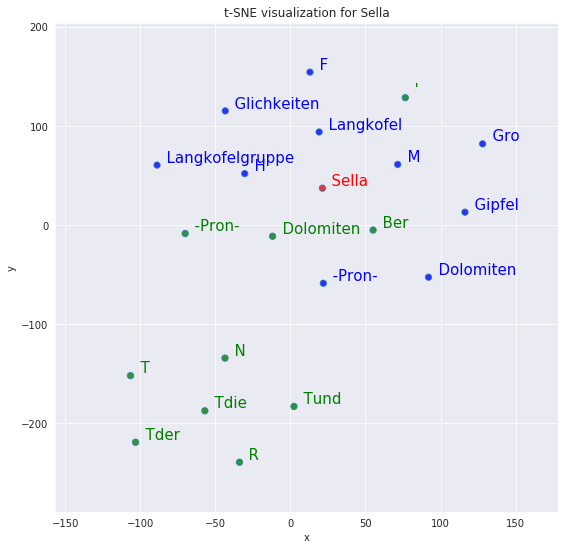

In [131]:
tsnescatterplot(w2v_model, 'sella', [i[0] for i in w2v_model.wv.most_similar(negative=["sella"])])

In [128]:
tsnescatterplot(w2v_model, 'langkofel', [i[0] for i in w2v_model.wv.most_similar(negative=["langkofel"])])

KeyError: "word 'ausgedehnt' not in vocabulary"